In [4]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows

# **Load data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab/PhanTichVaTrucQuanDuLieu_DS105.M11/DoAn/BDS_new.csv')

In [6]:
for i in range(2, 9):
    col = 'front_road_' +str(i)
    df[col] = df['front_road'].apply(lambda x: x**i)

In [7]:
df['toilets'].replace('0.0', '0', inplace=True)
df['toilets'].replace(0.0, '0', inplace=True)

In [8]:
df['list_time'] = pd.to_datetime(df['list_time'])

In [9]:
df['year'] = df['list_time'].dt.year
df['month'] = df['list_time'].dt.month

# **Prepare data**

In [201]:
df.columns

Index(['list_time', 'ward', 'area', 'region', 'direction',
       'property_legal_document', 'size (m2)', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (billion)',
       'type_details', 'website', 'front_road', 'type_real_estate'],
      dtype='object')

In [ ]:
for col in df_model.columns:
    print(col)
    print(df[col].unique())
    print('--------------------------------------\n')

In [157]:
X_data = df_model.iloc[:, 0:-1]
y_data = df_model.iloc[:, -1]

X_data.head()
y_data.head()

,type_real_estate,month,year,front_road,region,area,rooms,toilets,floors,property_legal_document,front_road_2,front_road_3,front_road_4,front_road_5,front_road_6,front_road_7,front_road_8
0,Căn hộ/Chung cư,11,2021,8.0,Đồng Nai,Thành phố Biên Hòa,2,2,Nhiều hơn 10,Đang chờ sổ,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0
1,Căn hộ/Chung cư,11,2021,8.0,Đồng Nai,Thành phố Biên Hòa,1,1,Nhiều hơn 10,Đã có sổ,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0
2,Căn hộ/Chung cư,11,2021,8.0,Đồng Nai,Thành phố Biên Hòa,2,2,Nhiều hơn 10,Giấy tờ khác,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0
3,Căn hộ/Chung cư,11,2021,8.0,Đồng Nai,Thành phố Biên Hòa,2,2,Nhiều hơn 10,Đã có sổ,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0
4,Căn hộ/Chung cư,11,2021,8.0,Đồng Nai,Thành phố Biên Hòa,2,1,Nhiều hơn 10,Đã có sổ,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0


0    1.15
1    1.55
2    0.36
3    1.70
4    0.01
Name: price (billion), dtype: float64

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [159]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [160]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# **Train model**

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math


def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae
    
# print('R2 score:', r2)
# print('Mean Square Error (MSE):', mse)
# print('Root Mean Square Error (RMSE):', rmse)
# print('Mean Absolute Error (MAE):', mae)

In [21]:
df.columns

Index(['list_time', 'ward', 'area', 'region', 'direction',
       'property_legal_document', 'size (m2)', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (billion)',
       'type_details', 'website', 'front_road', 'type_real_estate', 'year',
       'month'],
      dtype='object')

## **Linear Regression**

In [268]:
df1 = df.copy()

for column in df.columns:
    if df1[column].dtype == float:
        df1 = df1[df1[column] <= df1[column].quantile(0.98)]

y_data = df1['price (billion)']
X_data = df1.drop(columns=['list_time', 'ward',  'type_details', 'direction', 'living_size (m2)', 'length (m)', 'website', 'price (billion)'])


X_data = pd.get_dummies(X_data, drop_first=True)

<Figure size 792x720 with 0 Axes>

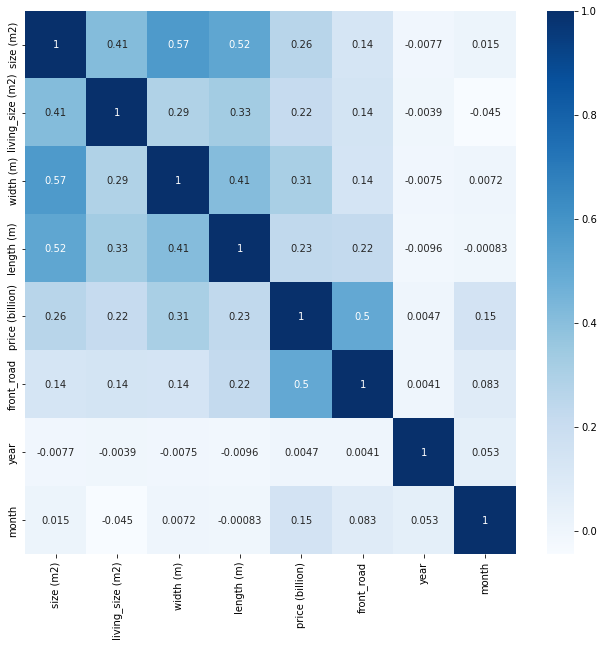

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 10))
sns.heatmap(data=df1.corr(), annot=True, cmap='Blues')

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [270]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [271]:
X_train.shape

(172229, 84)

In [272]:
X_test.shape

(19137, 84)

In [273]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [274]:
import pickle

model_filename = '/content/drive/MyDrive/Colab/PhanTichVaTrucQuanDuLieu_DS105.M11/linear_model.pkl'

In [275]:
with open(model_filename, 'wb') as file:  
    pickle.dump(linear_model, file)

In [276]:
with open(model_filename, 'rb') as file:  
    linear_model = pickle.load(file)

In [277]:
y_pred = linear_model.predict(X_test)
r2, mse, rmse, mae = evaluate_model(y_test, y_pred)

In [278]:
print('R2 score:', r2)
print('Mean Square Error (MSE):', mse)
print('Root Mean Square Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

R2 score: 0.6357759758523369
Mean Square Error (MSE): 46.32114808390451
Root Mean Square Error (RMSE): 6.805964155349668
Mean Absolute Error (MAE): 4.019550620928977


In [279]:
print('Actual \t Predict')
for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    print(true, '\t', pred)
    if i > 20:
        break

Actual 	 Predict
[3.8] 	 [3.75429372]
[1.7] 	 [2.45788168]
[6.4] 	 [8.52875208]
[1.75] 	 [7.1762562]
[5.] 	 [11.51631029]
[6.7] 	 [4.90775485]
[3.4] 	 [17.15954147]
[4.5] 	 [10.74242]
[45.] 	 [33.45781948]
[6.2] 	 [10.01723487]
[7.3] 	 [4.52161867]
[9.6] 	 [10.61245186]
[7.6] 	 [7.52860515]
[7.2] 	 [10.38901585]
[7.6] 	 [10.97148541]
[10.9] 	 [13.02524146]
[26.] 	 [23.54223099]
[0.55] 	 [3.00805483]
[3.85] 	 [3.15614156]
[7.2] 	 [10.12289817]
[1.1] 	 [4.95133912]
[2.4] 	 [7.70831305]


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution plot')

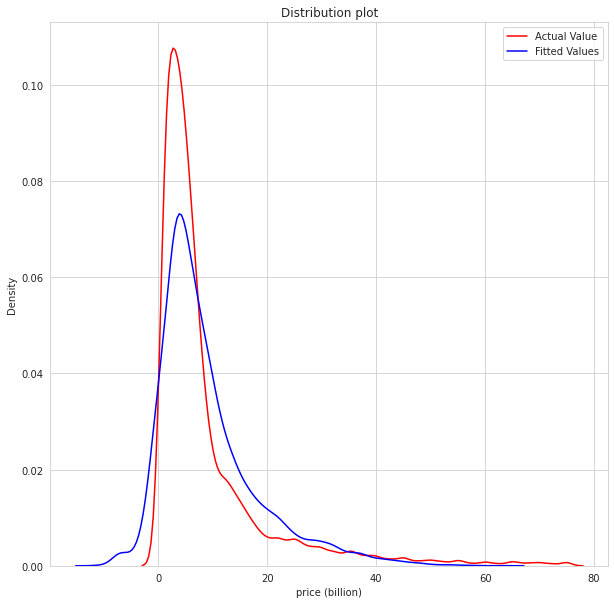

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
ax = sns.distplot(df1['price (billion)'], hist=False, color='r', label="Actual Value")
sns.distplot(y_pred, hist=False, color='b', label="Fitted Values", ax=ax)
plt.legend()
plt.title("Distribution plot")

## **Polynomial**

In [281]:
df2 = df.copy()

for column in df2.columns:
    if df2[column].dtype == float:
        df2 = df2[df2[column] <= df2[column].quantile(0.98)]

y_data = df2['price (billion)']
X_data = df2.drop(columns=['list_time', 'ward',  'type_details', 'direction', 'living_size (m2)', 'length (m)', 'website', 'price (billion)'])

# X_data['month'] = X_data['month'].astype('str')
# X_data['year'] = X_data['year'].astype('str')

X_data = pd.get_dummies(X_data, drop_first=True)

In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [283]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [284]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


dict_result = {'Degree': [], 'R2 score': [], 'Adjusted R2': [], 'MSE':[], 'RMSE':[], 'MAE':[]}

for i in range(1, 11):
    pipe = Pipeline([('poly', PolynomialFeatures(degree=i)), ('model', LinearRegression())])
    pipe.fit(X_train[['front_road', 'size (m2)', 'width (m)']], y_train)
    y_pred = pipe.predict(X_test[['front_road', 'size (m2)', 'width (m)']])
    r2, mse, rmse, mae = evaluate_model(y_test, y_pred)

    adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    dict_result['Degree'].append(i)
    dict_result['R2 score'].append(r2)
    dict_result['Adjusted R2'].append(adjusted_r2)
    dict_result['MSE'].append(mse)
    dict_result['RMSE'].append(rmse)
    dict_result['MAE'].append(mae)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures()), ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=6)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=7)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=9)),
                ('model', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('model', LinearRegression())])

In [285]:
pd.DataFrame(dict_result)

,Degree,R2 score,Adjusted R2,MSE,RMSE,MAE
0,1,0.328353,0.325391,85.418510,9.242213,5.973994
1,2,0.384290,0.381575,78.304566,8.848987,5.536173
2,3,0.425198,0.422664,73.101920,8.549966,5.277424
3,4,0.432078,0.429574,72.226972,8.498645,5.236598
4,5,0.339067,0.336153,84.055923,9.168202,5.452126
5,6,-1.452511,-1.463324,311.904571,17.660820,5.789783
6,7,-2.545897,-2.561530,450.958735,21.235789,6.262454
7,8,-3.084486,-3.102494,519.455235,22.791561,6.592276
8,9,-0.200292,-0.205584,152.650246,12.355171,7.173329
9,10,-3.185443,-3.203897,532.294722,23.071513,7.582525


Nhận xét: Mô hình huấn luyện trên ba thuộc tính size, width, front road cho kết quả cao nhất ở bậc 4

In [286]:
for i in range(2, 5):
    for col in X_train.columns:
        if col in ['size (m2)', 'width (m)', 'front_road']:
            new_col = col+ '_' + str(i)
            X_train[new_col] = X_train[col].apply(lambda x: x**i)

In [287]:
X_train.shape

(172229, 93)

In [288]:
for i in range(2, 5):
    for col in X_test.columns:
        if col in ['size (m2)', 'width (m)', 'front_road']:
            new_col = col+ '_' + str(i)
            X_test[new_col] = X_test[col].apply(lambda x: x**i)

In [289]:
X_train.head(5)

,size (m2),width (m),front_road,year,month,area_Huyện Bình Chánh,area_Huyện Bắc Tân Uyên,area_Huyện Cần Giờ,area_Huyện Cẩm Mỹ,area_Huyện Củ Chi,area_Huyện Dầu Tiếng,area_Huyện Hóc Môn,area_Huyện Long Thành,area_Huyện Nhà Bè,area_Huyện Nhơn Trạch,area_Huyện Phú Giáo,area_Huyện Thống Nhất,area_Huyện Trảng Bom,area_Huyện Tân Phú,area_Huyện Vĩnh Cửu,area_Huyện Xuân Lộc,area_Huyện Định Quán,area_Quận 1,area_Quận 10,area_Quận 11,area_Quận 12,area_Quận 2,area_Quận 3,area_Quận 4,area_Quận 5,area_Quận 6,area_Quận 7,area_Quận 8,area_Quận 9,area_Quận Bình Thạnh,area_Quận Bình Tân,area_Quận Gò Vấp,area_Quận Phú Nhuận,area_Quận Tân Bình,area_Quận Tân Phú,area_Thành phố Biên Hòa,area_Thành phố Dĩ An,area_Thành phố Long Khánh,area_Thành phố Thuận An,area_Thành phố Thủ Dầu Một,area_Thành phố Thủ Đức,area_Thị xã Bến Cát,area_Thị xã Tân Uyên,region_Hồ Chí Minh,region_Đồng Nai,property_legal_document_Đang chờ sổ,property_legal_document_Đã có sổ,rooms_1,rooms_10,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,rooms_9,rooms_Nhiều hơn 10,toilets_1,toilets_2,toilets_3,toilets_4,toilets_5,toilets_6,toilets_Nhiều hơn 6,floors_1,floors_10,floors_2,floors_3,floors_4,floors_5,floors_6,floors_7,floors_8,floors_9,floors_Nhiều hơn 10,type_real_estate_Khác,type_real_estate_Nhà ở,type_real_estate_Đất,size (m2)_2,width (m)_2,front_road_2,size (m2)_3,width (m)_3,front_road_3,size (m2)_4,width (m)_4,front_road_4
34084,40.0,5.00,8.0,2021,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1600.0,25.0000,64.0,64000.0,125.000000,512.0,2560000.0,625.000000,4096.0
1872,72.0,5.00,8.0,2021,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5184.0,25.0000,64.0,373248.0,125.000000,512.0,26873856.0,625.000000,4096.0
67999,58.0,4.00,8.0,2021,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3364.0,16.0000,64.0,195112.0,64.000000,512.0,11316496.0,256.000000,4096.0
41155,88.0,3.43,8.0,2021,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7744.0,11.7649,64.0,681472.0,40.353607,512.0,59969536.0,138.412872,4096.0
63142,72.0,5.00,8.0,2021,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5184.0,25.0000,64.0,373248.0,125.000000,512.0,26873856.0,625.000000,4096.0


In [290]:
X_test.shape

(19137, 93)

In [291]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [292]:
import pickle

model_filename = '/content/drive/MyDrive/Colab/PhanTichVaTrucQuanDuLieu_DS105.M11/poly_model.pkl'

In [293]:
with open(model_filename, 'wb') as file:  
    pickle.dump(poly_model, file)

In [294]:
with open(model_filename, 'rb') as file:  
    poly_model = pickle.load(file)

In [295]:
y_pred = poly_model.predict(X_test)
r2, mse, rmse, mae = evaluate_model(y_test, y_pred)

In [296]:
print('R2 score:', r2)
print('Mean Square Error (MSE):', mse)
print('Root Mean Square Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

R2 score: 0.685111332769617
Mean Square Error (MSE): 40.04679432899921
Root Mean Square Error (RMSE): 6.328253655551364
Mean Absolute Error (MAE): 3.8973117085307423


In [297]:
print('Actual \t Predict')
for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    print(true, '\t', pred)
    if i > 20:
        break

Actual 	 Predict
[3.8] 	 [1.46679338]
[1.7] 	 [2.64550774]
[6.4] 	 [7.89475291]
[1.75] 	 [5.63905158]
[5.] 	 [9.23133762]
[6.7] 	 [6.65352718]
[3.4] 	 [16.4587484]
[4.5] 	 [8.6513605]
[45.] 	 [33.09100365]
[6.2] 	 [7.43327474]
[7.3] 	 [3.47238309]
[9.6] 	 [10.89230177]
[7.6] 	 [7.33381249]
[7.2] 	 [8.96361656]
[7.6] 	 [11.85068125]
[10.9] 	 [13.04615988]
[26.] 	 [24.0140075]
[0.55] 	 [0.75452252]
[3.85] 	 [4.20743356]
[7.2] 	 [9.83795566]
[1.1] 	 [5.0251535]
[2.4] 	 [8.28433703]


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution plot')

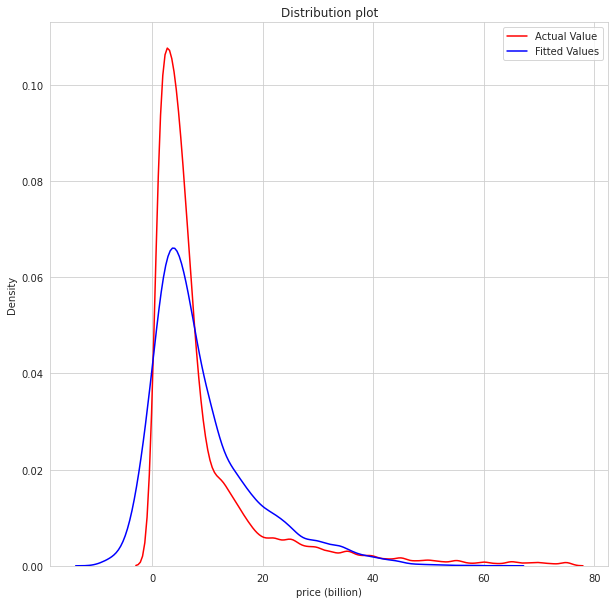

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
ax = sns.distplot(df1['price (billion)'], hist=False, color='r', label="Actual Value")
sns.distplot(y_pred, hist=False, color='b', label="Fitted Values", ax=ax)
plt.legend()
plt.title("Distribution plot")

## **Random Forest**

In [321]:
df3 = df.copy()

for column in df.columns:
    if df3[column].dtype == float:
        df3 = df3[df3[column] <= df3[column].quantile(0.98)]

y_data = df3['price (billion)']
X_data = df3.drop(columns=['list_time', 'ward',  'type_details', 'direction', 'living_size (m2)', 'length (m)', 'website', 'price (billion)'])

# X_data = pd.get_dummies(X_data, drop_first=True)

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [357]:
X_test.columns

Index(['size (m2)', 'width (m)', 'front_road', 'year', 'month',
       'area_Huyện Bình Chánh', 'area_Huyện Bắc Tân Uyên',
       'area_Huyện Cần Giờ', 'area_Huyện Cẩm Mỹ', 'area_Huyện Củ Chi',
       'area_Huyện Dầu Tiếng', 'area_Huyện Hóc Môn', 'area_Huyện Long Thành',
       'area_Huyện Nhà Bè', 'area_Huyện Nhơn Trạch', 'area_Huyện Phú Giáo',
       'area_Huyện Thống Nhất', 'area_Huyện Trảng Bom', 'area_Huyện Tân Phú',
       'area_Huyện Vĩnh Cửu', 'area_Huyện Xuân Lộc', 'area_Huyện Định Quán',
       'area_Quận 1', 'area_Quận 10', 'area_Quận 11', 'area_Quận 12',
       'area_Quận 2', 'area_Quận 3', 'area_Quận 4', 'area_Quận 5',
       'area_Quận 6', 'area_Quận 7', 'area_Quận 8', 'area_Quận 9',
       'area_Quận Bình Thạnh', 'area_Quận Bình Tân', 'area_Quận Gò Vấp',
       'area_Quận Phú Nhuận', 'area_Quận Tân Bình', 'area_Quận Tân Phú',
       'area_Thành phố Biên Hòa', 'area_Thành phố Dĩ An',
       'area_Thành phố Long Khánh', 'area_Thành phố Thuận An',
       'area_Thành phố Thủ

In [302]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [303]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [311]:
import pickle

model_filename = '/content/drive/MyDrive/Colab/PhanTichVaTrucQuanDuLieu_DS105.M11/rf_model.pkl'

In [312]:
with open(model_filename, 'wb') as file:  
    pickle.dump(rf_model, file)

In [313]:
with open(model_filename, 'rb') as file:  
    rf_model = pickle.load(file)

In [314]:
y_pred = rf_model.predict(X_test)
r2, mse, rmse, mae = evaluate_model(y_test, y_pred)

In [315]:
print('R2 score:', r2)
print('Mean Square Error (MSE):', mse)
print('Root Mean Square Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

R2 score: 0.8438847810165002
Mean Square Error (MSE): 19.854363515993995
Root Mean Square Error (RMSE): 4.455823550814596
Mean Absolute Error (MAE): 2.1177607170099746


In [316]:
print('Actual \t Predict')
for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    print(true, '\t', pred)
    if i > 20:
        break

Actual 	 Predict
[3.8] 	 3.364397499999999
[1.7] 	 1.5564211624649864
[6.4] 	 7.388841666666659
[1.75] 	 1.8742
[5.] 	 6.124499999999997
[6.7] 	 5.796126666666667
[3.4] 	 3.8467399999999983
[4.5] 	 6.763300000000002
[45.] 	 46.12466666666667
[6.2] 	 6.419365714285715
[7.3] 	 6.5306933333333355
[9.6] 	 8.09826666666667
[7.6] 	 6.249333333333334
[7.2] 	 8.365293650793655
[7.6] 	 7.320000000000002
[10.9] 	 13.225316666666671
[26.] 	 22.319000000000003
[0.55] 	 0.9168426190476187
[3.85] 	 3.5925100000000008
[7.2] 	 6.222049999999999
[1.1] 	 1.8737077873015868
[2.4] 	 4.400071051200374


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution plot')

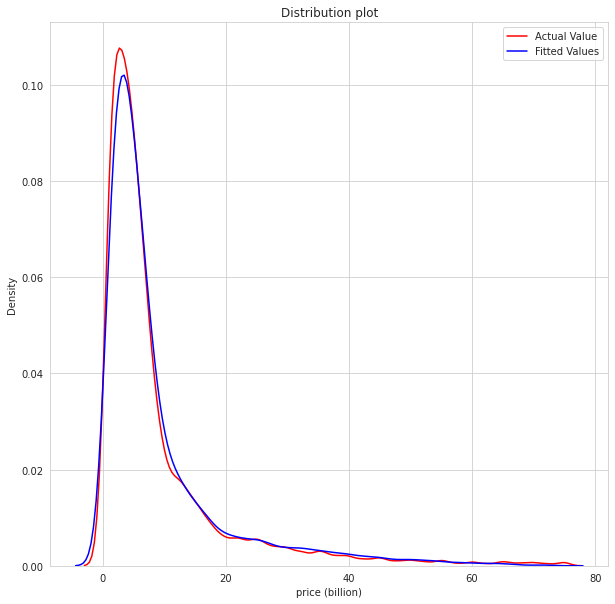

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
ax = sns.distplot(df1['price (billion)'], hist=False, color='r', label="Actual Value")
sns.distplot(y_pred, hist=False, color='b', label="Fitted Values", ax=ax)
plt.legend()
plt.title("Distribution plot")

## **KNN**

In [10]:
df4 = df.copy()

for column in df.columns:
    if df4[column].dtype == float:
        df4 = df4[df4[column] <= df4[column].quantile(0.98)]

y_data = df4['price (billion)']
X_data = df4.drop(columns=['list_time', 'ward',  'type_details', 'direction', 'living_size (m2)', 'length (m)', 'website', 'price (billion)'])

X_data = pd.get_dummies(X_data, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [12]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', metric='manhattan')
knn_model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=9, weights='distance')

In [20]:
import pickle

model_filename = '/content/drive/MyDrive/Colab/PhanTichVaTrucQuanDuLieu_DS105.M11/knn_model.pkl'

In [21]:
with open(model_filename, 'wb') as file:  
    pickle.dump(knn_model, file)

In [22]:
with open(model_filename, 'rb') as file:  
    knn_model = pickle.load(file)

In [ ]:
y_pred = knn_model.predict(X_test)
r2, mse, rmse, mae = evaluate_model(y_test, y_pred)

In [16]:
r2, mse, rmse, mae = evaluate_model(y_test, y_pred)

In [17]:
print('R2 score:', r2)
print('Mean Square Error (MSE):', mse)
print('Root Mean Square Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

R2 score: 0.7140767920562558
Mean Square Error (MSE): 36.36303587271805
Root Mean Square Error (RMSE): 6.030177101273067
Mean Absolute Error (MAE): 2.7814710841361134


In [258]:
print('Actual \t Predict')
for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    print(true, '\t', pred)
    if i > 20:
        break

Actual 	 Predict
[3.8] 	 [6.61]
[1.7] 	 [1.858]
[6.4] 	 [6.61]
[1.75] 	 [1.868]
[5.] 	 [6.08]
[6.7] 	 [6.59]
[3.4] 	 [3.308]
[4.5] 	 [10.72]
[45.] 	 [45.6]
[6.2] 	 [5.79]
[7.3] 	 [7.12]
[9.6] 	 [6.97]
[7.6] 	 [7.12]
[7.2] 	 [7.62]
[7.6] 	 [7.36]
[10.9] 	 [12.26]
[26.] 	 [13.82]
[0.55] 	 [1.002]
[3.85] 	 [4.07]
[7.2] 	 [5.19]
[1.1] 	 [3.11372]
[2.4] 	 [4.16]


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution plot')

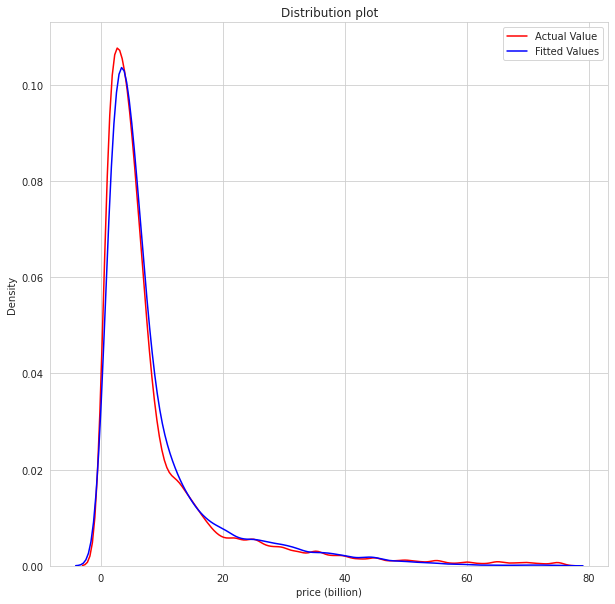

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
ax = sns.distplot(df4['price (billion)'], hist=False, color='r', label="Actual Value")
sns.distplot(y_pred, hist=False, color='b', label="Fitted Values", ax=ax)
plt.legend()
plt.title("Distribution plot")

In [449]:
def load_model(file_name):
    with open(model_filename, 'rb') as file:  
        model = pickle.load(file)
    return model

def predict_input(area, region, property_legal_document, size, rooms, toilets, floors, width, front_road, type_real_estate, year, month):
    type_real_estate = "type_real_estate_" + type_real_estate
    area = "area_" + area
    property_legal_document = 'property_legal_document_' + property_legal_document
    rooms = "rooms_"+ rooms
    toilets = "toilets_"+ toilets
    floors = "floors_"+ floors

    feature_name = ['size', 'width', 'front_road', 'year', 'month',
                    'area_Huyện Bình Chánh', 'area_Huyện Bắc Tân Uyên',
                    'area_Huyện Cần Giờ', 'area_Huyện Cẩm Mỹ', 'area_Huyện Củ Chi',
                    'area_Huyện Dầu Tiếng', 'area_Huyện Hóc Môn', 'area_Huyện Long Thành',
                    'area_Huyện Nhà Bè', 'area_Huyện Nhơn Trạch', 'area_Huyện Phú Giáo',
                    'area_Huyện Thống Nhất', 'area_Huyện Trảng Bom', 'area_Huyện Tân Phú',
                    'area_Huyện Vĩnh Cửu', 'area_Huyện Xuân Lộc', 'area_Huyện Định Quán',
                    'area_Quận 1', 'area_Quận 10', 'area_Quận 11', 'area_Quận 12',
                    'area_Quận 2', 'area_Quận 3', 'area_Quận 4', 'area_Quận 5',
                    'area_Quận 6', 'area_Quận 7', 'area_Quận 8', 'area_Quận 9',
                    'area_Quận Bình Thạnh', 'area_Quận Bình Tân', 'area_Quận Gò Vấp',
                    'area_Quận Phú Nhuận', 'area_Quận Tân Bình', 'area_Quận Tân Phú',
                    'area_Thành phố Biên Hòa', 'area_Thành phố Dĩ An',
                    'area_Thành phố Long Khánh', 'area_Thành phố Thuận An',
                    'area_Thành phố Thủ Dầu Một', 'area_Thành phố Thủ Đức',
                    'area_Thị xã Bến Cát', 'area_Thị xã Tân Uyên', 'region_Hồ Chí Minh',
                    'region_Đồng Nai', 'property_legal_document_Đang chờ sổ',
                    'property_legal_document_Đã có sổ', 'rooms_1', 'rooms_10', 'rooms_2',
                    'rooms_3', 'rooms_4', 'rooms_5', 'rooms_6', 'rooms_7', 'rooms_8',
                    'rooms_9', 'rooms_Nhiều hơn 10', 'toilets_1', 'toilets_2', 'toilets_3',
                    'toilets_4', 'toilets_5', 'toilets_6', 'toilets_Nhiều hơn 6',
                    'floors_1', 'floors_10', 'floors_2', 'floors_3', 'floors_4', 'floors_5',
                    'floors_6', 'floors_7', 'floors_8', 'floors_9', 'floors_Nhiều hơn 10',
                    'type_real_estate_Khác', 'type_real_estate_Nhà ở',
                    'type_real_estate_Đất']

    df = pd.DataFrame(columns=feature_name)
    df.at[0, :] = 0

    if type_real_estate in df.columns:
        df[type_real_estate] = 1
    if area in df.columns:
        df[area] = 1
    if rooms in df.columns:
        df[rooms] = 1
    if toilets in df.columns:
        df[toilets] = 1
    if property_legal_document in df.columns:
        df[property_legal_document] = 1
    if floors in df.columns:
        df[floors] = 1

    df['width'] = width_m
    df['size'] = size
    df['front_road'] = front_road
    df['year'] = year
    df['month'] = month

    model = load_model('/content/drive/MyDrive/Colab/PhanTichVaTrucQuanDuLieu_DS105.M11/rf_model.pkl')

    price_predict = round(model.predict(df)[0], 2)
    print(f"Giá dự đoán cho bất động sản là: {price_predict} tỷ đồng")

# **Demo**

In [467]:
type_real_estate = "Nh\xE0 \u1EDF" #@param ['Căn hộ/Chung cư', 'Nhà ở', 'Đất', 'Khác']

area = "Huy\u1EC7n V\u0129nh C\u1EEDu" #@param ["Thành phố Biên Hòa", 'Huyện Nhơn Trạch', 'Huyện Long Thành', 'Huyện Vĩnh Cửu', 'Huyện Trảng Bom', 'Thành phố Long Khánh', 'Huyện Thống Nhất', 'Huyện Định Quán', 'Huyện Xuân Lộc', 'Huyện Cẩm Mỹ', 'Huyện Tân Phú', 'Thành phố Thuận An', 'Thành phố Dĩ An', 'Thị xã Tân Uyên', 'Thành phố Thủ Dầu Một', 'Thị xã Bến Cát', 'Huyện Bàu Bàng', 'Huyện Phú Giáo', 'Huyện Dầu Tiếng', 'Huyện Bắc Tân Uyên', 'Quận 9', 'Quận Bình Tân', 'Thành phố Thủ Đức', 'Quận Bình Thạnh', 'Quận 12', 'Quận Tân Phú', 'Quận 7', 'Huyện Nhà Bè', 'Quận Phú Nhuận', 'Quận 8', 'Quận 2', 'Quận Tân Bình', 'Quận 6', 'Quận 10', 'Quận 3', 'Quận Gò Vấp', 'Huyện Bình Chánh', 'Quận 4', 'Quận 5', 'Quận 1', 'Huyện Hóc Môn', 'Quận 11', 'Huyện Củ Chi', 'Huyện Cần Giờ']

region = "\u0110\u1ED3ng Nai" #@param ["Đồng Nai", "Bình Dương", "Hồ Chí Minh"]

month =  2#@param {type:"slider", min:1, max:12}

year =  2016#@param {type:"slider", min:2015, max:2025}

property_legal_document = "Gi\u1EA5y t\u1EDD kh\xE1c" #@param ["Đang chờ sổ", "Đã có sổ", "Giấy tờ khác"]

rooms = "1" #@param ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Nhiều hơn 10']

toilets = "0" #@param ['0', '1', '2', '3', '4', '5', '6', 'Nhiều hơn 6']

floors = "6" #@param ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Nhiều hơn 10']

width = 0.4 #@param {type:"slider", min:0, max:30, step:0.2}

size = 26.5 #@param {type:"slider", min:1, max:2500, step:0.5}

front_road = 0.4 #@param {type:"slider", min:0, max:30, step:0.2}



In [468]:
predict_input(area, region, property_legal_document, size, rooms, toilets, floors, width, front_road, type_real_estate, year, month)

Giá dự đoán cho bất động sản là: 1.68 tỷ đồng
